# Modified IQAE tests

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np

from random import sample, seed
from collections import defaultdict

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, transpile, assemble
from qiskit.algorithms import amplitude_estimators, EstimationProblem
from qiskit.algorithms import IterativeAmplitudeEstimation as BaseIterativeAmplitudeEstimation

from algorithms import IterativeAmplitudeEstimation, ModifiedIterativeAmplitudeEstimation
from algorithms import NoQuantumIterativeAmplitudeEstimation
from operators import *

In [2]:
# for setting a single amplitude, below automates this for arbirtrary numbers of amplitudes
n = 4
N = 2**n
k = N//2
marked = sample(range(N), k)

In [3]:
# Define the estimation problem and oracle function
def make_problems(n, marked):
    
    def good_state(state):
        bin_marked = [(n-len(bin(s))+2)*'0'+bin(s)[2:] for s in marked]
        return (state in bin_marked)

    problem = EstimationProblem(
        state_preparation=A(n),  # A operator
        grover_operator=Q(n, marked),  # Q operator
        objective_qubits=range(n),
        is_good_state=good_state  # the "good" state Psi1 is identified as measuring |1> in qubit 0
    )

    problem2 = EstimationProblem(
        state_preparation=A(n),  # A operator
        grover_operator=Q(n, marked),  # Q operator
        objective_qubits=range(n),
        is_good_state=good_state  # the "good" state Psi1 is identified as measuring |1> in qubit 0
    )
    
    return problem, problem2

In [4]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 100

## Compare Modified IQAE to No-Quantum IQAE

In [5]:
# parameters for IQAE

# amplitudes
n = 4
k = 2**n

# epsilons
powers = range(2,7)
epsilons = [(1.0 / (10**power)) for power in powers]

# other
alpha = 0.05
confint_method = 'chernoff'
verbose = False

a: 0/16 = 0.0
Modified IAE estimations: [0.00011438746507276735, 1.0208993609805493e-06, 1.0734059911823906e-08, 7.03225631711915e-11, 4.742940173859972e-13]
Original IAE estimations: [4.5459085893367654e-05, 1.9947285420675235e-06, 4.923525110072622e-09, 6.235463877894556e-11, 5.911852271772893e-13]
Modified IAE total queries: 70910500
Original IAE total queries: 139982800
Modified IAE epsilons (CI width): [0.00011438746507276735, 1.0208993609805493e-06, 1.0734059911823906e-08, 7.03225631711915e-11, 4.742940173859972e-13]
Original IAE epsilons (CI width): [4.5459085893367654e-05, 1.9947285420675235e-06, 4.923525110072622e-09, 6.235463877894556e-11, 5.911852271772893e-13]
round_shots
{0: 200, 1: 200, 4: 200, 14: 200, 48: 200, 166: 200, 584: 200, 2106: 100, 6478: 100, 20498: 100, 66986: 100, 227272: 100}
n_queries
{0: 200, 1: 600, 4: 1800, 14: 5800, 48: 19400, 166: 66600, 584: 233800, 2106: 421300, 6478: 1295700, 20498: 4099700, 66986: 13397300, 227272: 45454500}
ks
[0, 0, 0, 1, 1, 4, 4

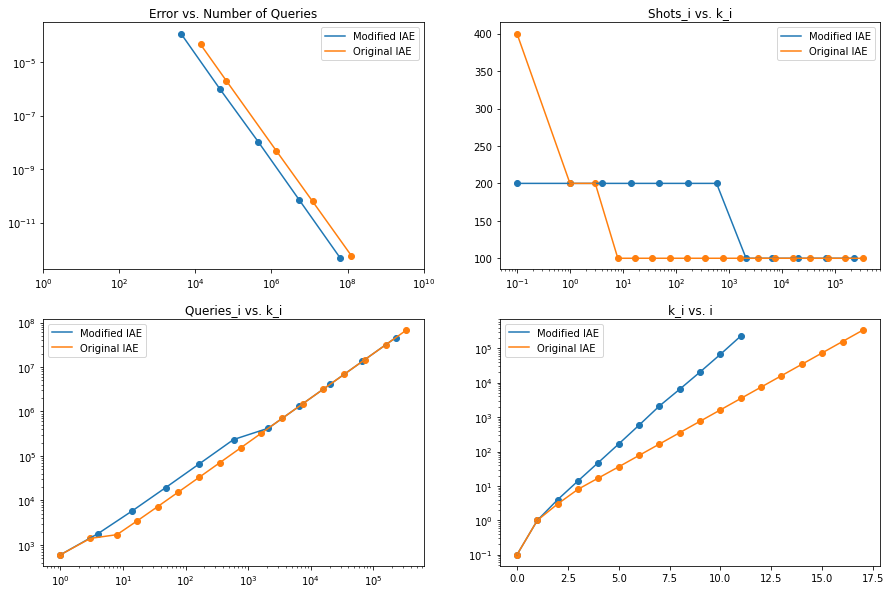

equal R: False
q_i: 3, theta_i_min: 3.141592653589793, theta_i_max: 3.678624592344479
equal R: False
q_i: 1, theta_i_min: 1.0393283204150279, theta_i_max: 1.5707963267948966
equal R: False
q_i: 1, theta_i_min: 1.069874443028678, theta_i_max: 1.5707963267948966
equal R: False
q_i: 1, theta_i_min: 1.0857139574619525, theta_i_max: 1.4677460793528252
equal R: False
q_i: 3, theta_i_min: 3.360367557225121, theta_i_max: 3.8798171527810466
equal R: False
q_i: 2, theta_i_min: 1.5707963267948966, theta_i_max: 2.235003124100486
equal R: False
q_i: 2, theta_i_min: 1.5989044221561899, theta_i_max: 2.171213645342851
a: 1/16 = 0.0625
Modified IAE estimations: [0.32778363422789486, 0.7169972973495634, 0.6743921461227271, 0.7702607291227255, 0.7358820267164183]
Original IAE estimations: [0.06289479947217548, 0.06244823688564125, 0.06249508617859999, 0.062499437167394166, 0.06250011035360743]
Modified IAE total queries: 94811800
Original IAE total queries: 156697400
Modified IAE epsilons (CI width): [0.

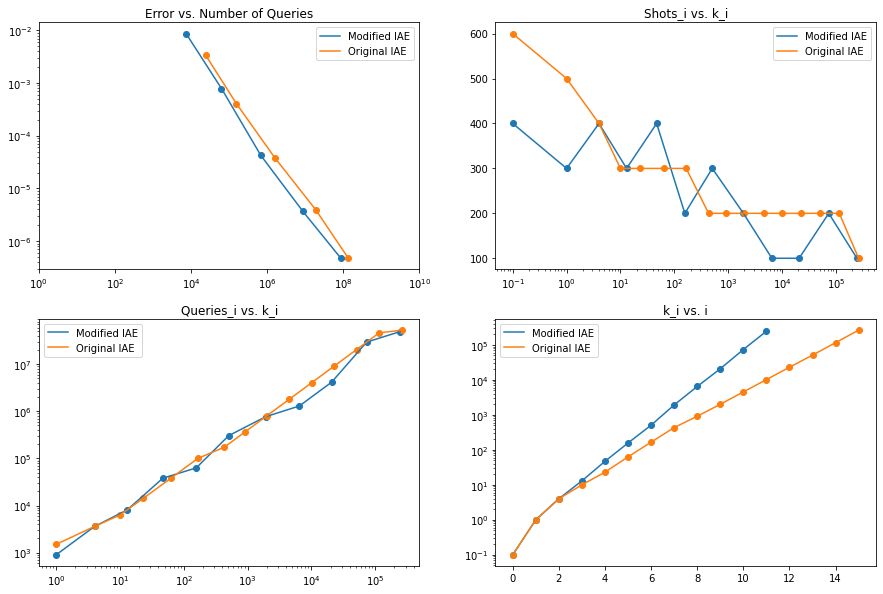

equal R: False
q_i: 1, theta_i_min: 0.9769219016720104, theta_i_max: 1.4405266371843835
equal R: False
q_i: 1, theta_i_min: 0.9059292596847486, theta_i_max: 1.3467392280752195
equal R: False
q_i: 3, theta_i_min: 3.3861817367408937, theta_i_max: 3.7549774166780425
equal R: False
q_i: 2, theta_i_min: 1.5707963267948966, theta_i_max: 2.1218163566932287
equal R: False
q_i: 2, theta_i_min: 1.5707963267948966, theta_i_max: 2.0835449843354388
equal R: False
q_i: 1, theta_i_min: 1.0430470155364326, theta_i_max: 1.5707963267948966
equal R: False
q_i: 1, theta_i_min: 1.0618378232450931, theta_i_max: 1.437853669257779
equal R: False
q_i: 1, theta_i_min: 0.8831228744335322, theta_i_max: 1.5707963267948966
equal R: False
q_i: 1, theta_i_min: 0.9214050682706424, theta_i_max: 1.3844197824910944
equal R: False
q_i: 1, theta_i_min: 0.9315732990549132, theta_i_max: 1.3850636269869832
equal R: False
q_i: 3, theta_i_min: 3.141592653589793, theta_i_max: 3.6893509717208204
equal R: False
q_i: 1, theta_i_min

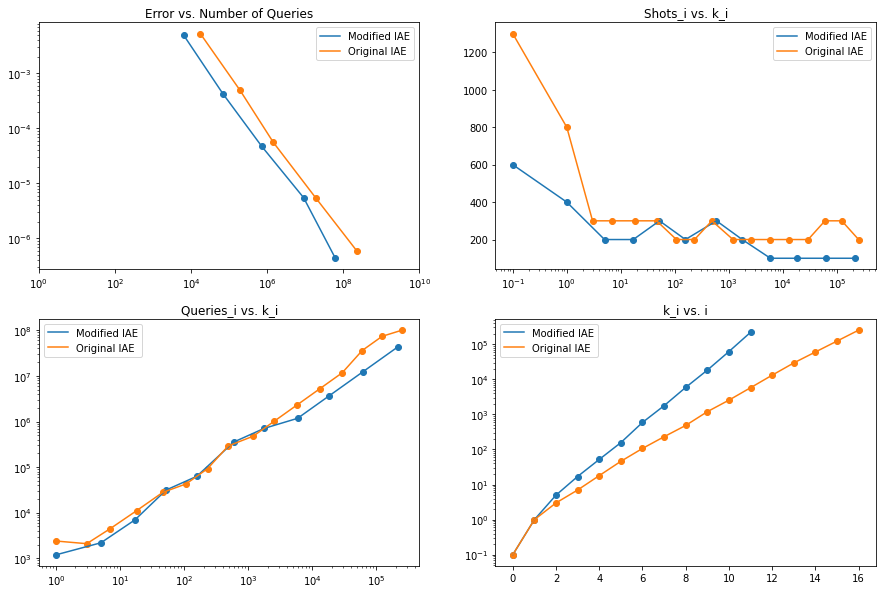

equal R: False
q_i: 2, theta_i_min: 1.5707963267948966, theta_i_max: 2.0501156334354294
equal R: False
q_i: 3, theta_i_min: 3.141592653589793, theta_i_max: 3.530820996999307
equal R: False
q_i: 2, theta_i_min: 1.5707963267948966, theta_i_max: 2.096600648490366
equal R: False
q_i: 1, theta_i_min: 1.1000579147054776, theta_i_max: 1.5707963267948966
equal R: False
q_i: 1, theta_i_min: 1.1180180359444536, theta_i_max: 1.5707963267948966
equal R: False
q_i: 3, theta_i_min: 3.4011966389221686, theta_i_max: 3.860904796138093
equal R: False
q_i: 1, theta_i_min: 0.9177218252191376, theta_i_max: 1.4261240805188162
equal R: False
q_i: 1, theta_i_min: 1.119454218027661, theta_i_max: 1.5707963267948966
equal R: False
q_i: 1, theta_i_min: 1.0592305409559424, theta_i_max: 1.48694763153433
a: 3/16 = 0.1875
Modified IAE estimations: [0.971496509145908, 0.9500986926319239, 0.9622720171509693, 0.7601591588844396, 0.9540104719191114]
Original IAE estimations: [0.1879314540324974, 0.18741902231917407, 0.18

<ipython-input-6-72974497072e>:132: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[0,0].scatter(iae_nshots_i, iae_epsilon_i)


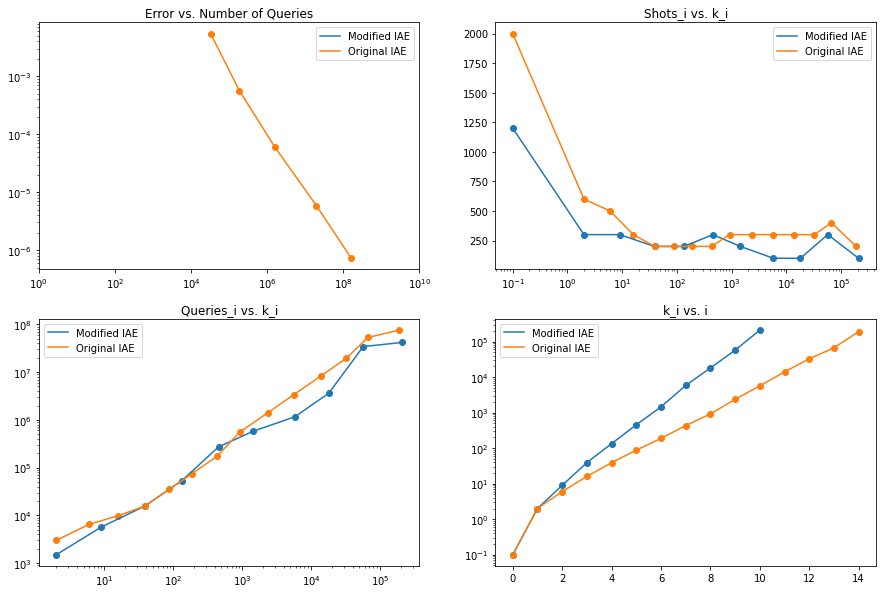

equal R: False
q_i: 1, theta_i_min: 1.1508714168257224, theta_i_max: 1.5707963267948966
equal R: False
q_i: 1, theta_i_min: 1.1637451496248963, theta_i_max: 1.5707963267948966
equal R: False
q_i: 3, theta_i_min: 3.428856723855757, theta_i_max: 3.906709667306301
equal R: False
q_i: 1, theta_i_min: 1.1497361382850233, theta_i_max: 1.5707963267948966
equal R: False
q_i: 3, theta_i_min: 3.141592653589793, theta_i_max: 3.8344968172207814
a: 4/16 = 0.25
Modified IAE estimations: [0.9516310198361376, 0.956421207544774, 0.9588501415208102, 0.9560757512659145, 0.9998339971516401]
Original IAE estimations: [0.25276569477880156, 0.2500137603749563, 0.25000854602874345, 0.24999966365457982, 0.2500000843860681]
Modified IAE total queries: 62711500
Original IAE total queries: 291026500
Modified IAE epsilons (CI width): [0.0035808239871479852, 0.0003515212765266562, 2.2455859623904395e-05, 1.2848475799964731e-06, 1.5004276543439943e-08]
Original IAE epsilons (CI width): [0.007557801980042966, 0.00075

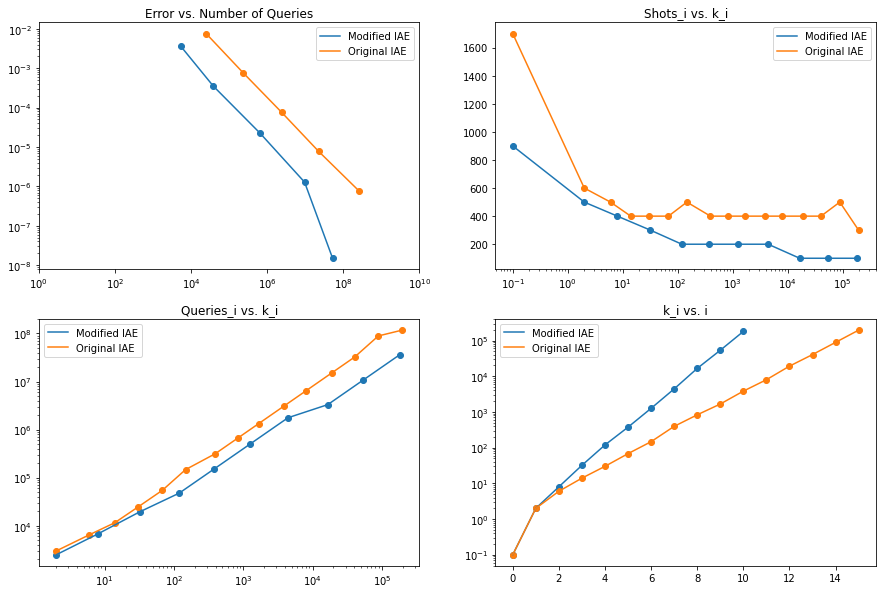

equal R: False
q_i: 1, theta_i_min: 1.100105530215858, theta_i_max: 1.5707963267948966
equal R: False
q_i: 1, theta_i_min: 1.1281489209751627, theta_i_max: 1.5707963267948966
equal R: False
q_i: 1, theta_i_min: 1.1453779230610355, theta_i_max: 1.5707963267948966
equal R: False
q_i: 1, theta_i_min: 1.1541093729196479, theta_i_max: 1.5707963267948966
equal R: False
q_i: 1, theta_i_min: 1.1613940341749807, theta_i_max: 1.5707963267948966
equal R: False
q_i: 1, theta_i_min: 1.1675979316217415, theta_i_max: 1.5707963267948966
equal R: False
q_i: 1, theta_i_min: 1.1823903348435716, theta_i_max: 1.5707963267948966
equal R: False
q_i: 1, theta_i_min: 1.1920230367948415, theta_i_max: 1.5707963267948966
equal R: False
q_i: 1, theta_i_min: 1.1963358832503634, theta_i_max: 1.5707963267948966
equal R: False
q_i: 1, theta_i_min: 1.2051680620015712, theta_i_max: 1.5707963267948966
equal R: False
q_i: 1, theta_i_min: 1.2083173944512577, theta_i_max: 1.5707963267948966
equal R: False
q_i: 1, theta_i_mi

KeyboardInterrupt: 

In [6]:
# stats recording
iae_epsilon = []
iae_nshots = []
miae_epsilon = []
miae_nshots = []

wins = matches = 0

tdelta = 0

ki = 0
while ki <= k:
    
    # setup problems with specified N,k
    N = 2**n
    marked = sample(range(N), ki)
    problem, problem2 = make_problems(n, marked)
    
    # execute experiments for each power
    miae_results = [] 
    iae_results = []
    
    for i, epsilon in enumerate(epsilons):
        if verbose:
            print('ε:',epsilon)
            
        MIAE = ModifiedIterativeAmplitudeEstimation(epsilon_target=epsilon, 
                                                    alpha=alpha, 
                                                    confint_method=confint_method, 
                                                    quantum_instance=aer_sim)
        
        IAE = IterativeAmplitudeEstimation(epsilon_target=epsilon, 
                                                    alpha=alpha, 
                                                    confint_method=confint_method, 
                                                    quantum_instance=aer_sim)
        
        exprs = ['Modified IAE', 'Original IAE']
        
        # configure the number of shots this way and pray that it works
        MIAE._quantum_instance._run_config.shots = shots
        IAE._quantum_instance._run_config.shots = shots
        
        # for recording intermediate algo results
        state = defaultdict(dict)
        state2 = defaultdict(dict)
        
        ti = time.time()
        
        miae_result = MIAE.estimate(problem,
                                    state=state,
                                    verbose=verbose)
        
        iae_result = IAE.estimate(problem2,
                                  state=state2,
#                                   min_ratio=2.,
#                                    nmax_only=True,
#                                   k0=ki,
#                                   N=N,
                                  verbose=verbose)
        
        tdelta += time.time() - ti
        
        miae_results.append(miae_result)
        iae_results.append(iae_result)
        if verbose:
            print()
            
    # process results
    miae_epsilon_i = [(res.confidence_interval_processed[1] - res.confidence_interval_processed[0]) / 2 for res in miae_results]
    miae_nshots_i  = [res.num_oracle_queries for res in miae_results]

    iae_epsilon_i = [(res.confidence_interval_processed[1] - res.confidence_interval_processed[0]) / 2 for res in iae_results]
    iae_nshots_i  = [res.num_oracle_queries for res in iae_results]
    
    print(f'a: {ki}/{N} = {ki/N}')
    print(f'{exprs[0]} estimations:', [res.estimation for res in miae_results])
    print(f'{exprs[1]} estimations:', [res.estimation for res in iae_results])
    
    miae_total_queries, iae_total_queries = sum(miae_nshots_i), sum(iae_nshots_i)
    print(f'{exprs[0]} total queries:', miae_total_queries)
    print(f'{exprs[1]} total queries:', iae_total_queries)
    
    print(f'{exprs[0]} epsilons (CI width):', miae_epsilon_i)
    print(f'{exprs[1]} epsilons (CI width):', iae_epsilon_i)
    
    diff = round(abs(iae_total_queries - miae_total_queries) / miae_total_queries * 100, 2)
#     print('Modified version wins?', iae_total_queries < miae_total_queries, f'with {diff}% difference')
    
    wins += int(iae_total_queries < miae_total_queries)
    matches += 1
    
    # graph k_i vs num_shots
    def process_state(state, verbose=False):
        if verbose:
            for k,v in state.items():
                print(k)
                print(v)
        if len(state) == 0: return [],[],[]
        round_shots = state['round_shots']
        queries = state['n_queries']
        removed = False
        
        if 0 in round_shots:
            shots_at_k0 = round_shots.pop(0)
            removed = True
        if 0 in queries:
            queries_at_k0 = queries.pop(0)
    
        k_i = [k for k in round_shots]
        queries_i = [queries[k] for k in k_i]
        shots_i = ([shots_at_k0] if removed else []) + [round_shots[k] for k in k_i]
    
        if removed:
            k_i.insert(0, 0.1)
        
        return shots_i, queries_i, k_i
    
    mod_shots, mod_queries, mod_k = process_state(state, True)
    base_shots, base_queries, base_k = process_state(state2)

    fig,axs = plt.subplots(2,2,figsize=(15,10))
    
    # plot query complexity
    
    axs[0,0].set_yscale('log')
    axs[0,0].set_xscale('log')
    axs[0,0].set_xlim(1, 10**10)
    axs[0,0].set_title('Error vs. Number of Queries')
    
    axs[0,0].scatter(miae_nshots_i, miae_epsilon_i)
    axs[0,0].plot(miae_nshots_i, miae_epsilon_i)
    axs[0,0].scatter(iae_nshots_i, iae_epsilon_i)
    axs[0,0].plot(iae_nshots_i, iae_epsilon_i)
    
    axs[0,0].legend(exprs)
    
    # plots for shots vs k
    axs[0,1].set_xscale('log')
    axs[0,1].set_title('Shots_i vs. k_i')
    
    axs[0,1].plot(mod_k, mod_shots)
    axs[0,1].scatter(mod_k, mod_shots)
    axs[0,1].plot(base_k, base_shots)
    axs[0,1].scatter(base_k, base_shots)
    
    axs[0,1].legend(exprs)
    
    # plots for nqueries vs k
    axs[1,0].set_xscale('log')
    axs[1,0].set_yscale('log')
    axs[1,0].set_title('Queries_i vs. k_i')
    
    axs[1,0].plot(mod_k[1:], mod_queries)
    axs[1,0].scatter(mod_k[1:], mod_queries)
    axs[1,0].plot(base_k[1:], base_queries)
    axs[1,0].scatter(base_k[1:], base_queries)
    
    axs[1,0].legend(exprs)
    
    # plots for k
    axs[1,1].set_yscale('log')
    axs[1,1].set_title('k_i vs. i')
    
    axs[1,1].plot(mod_k)
    axs[1,1].scatter(range(len(mod_k)), mod_k)
    axs[1,1].plot(base_k)
    axs[1,1].scatter(range(len(base_k)), base_k)
    
    axs[1,1].legend(exprs)
    
    plt.show()
    
    # save results for epsilon vs nshots
    miae_nshots.append(miae_nshots_i)
    miae_epsilon.append(miae_epsilon_i)
    iae_nshots.append(iae_nshots_i)
    iae_epsilon.append(iae_epsilon_i)
    
    ki += 1
    
iae_nshots = np.array(iae_nshots)
# print('% modified > 3x modified:', wins/matches)

In [ ]:
print(base_shots)

In [ ]:
print(tdelta)

# 

In [ ]:
for i in range(len(epsilons)):
    plt.plot(2**np.arange(iae_nshots.shape[0]), iae_nshots[:,i])
    plt.scatter(2**np.arange(iae_nshots.shape[0]), iae_nshots[:,i])

plt.title('Number of queries vs. 1/Input amplitude')
plt.legend(['{:.0e}'.format(eps) for eps in epsilons])
plt.xscale('log')
plt.yscale('log')

plt.show()